# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

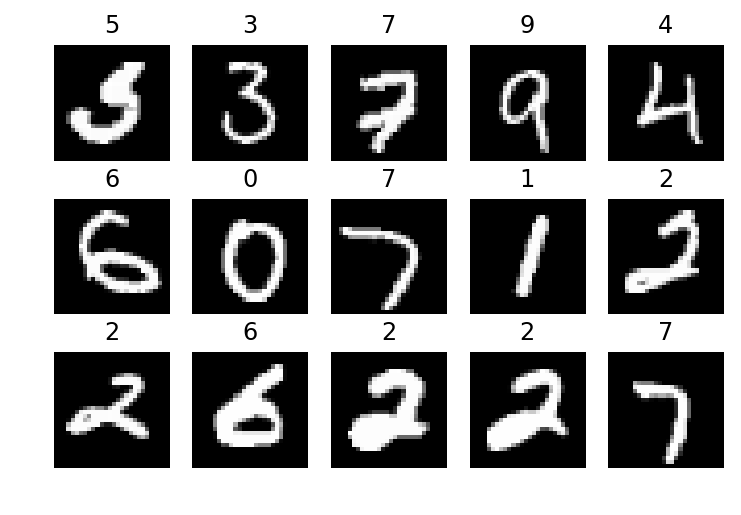

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


for i in range(15):
    plt.subplot(3, 5,i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
start = time.clock()

n_class, n_len, width, height = 11, 5, 28, 28

#生成一个含有5个元素的list，由1和0组成；1代表图片，0代表空字符，并且list的元素是随机分配的
def random_list():
    #随机取1~5个1
    n_picture = random.randint(1,5)
    rlist = []
    for i in range(n_picture):
        rlist.append(1)
    #如果不足5个1,余下的位置添0    
    if n_picture <5:
        for i in range((5 - n_picture)):
            rlist.append(0)
    #用random.sample命令洗牌，让1在list中随机分配
    return random.sample(rlist,5)

#生成数据集
def generate_dataset(X, y):
    X_len = X.shape[0]
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]

    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        
        #初始一个28行的空矩阵，每得到一个图片数据就横向添加一个矩阵
        c = np.array([[] for m in range(28)])
        
        #读取一个随机的random_list
        for k, picture in enumerate(random_list()):            
            #如果是图片（在random_list中是数字1）的话，随机从图片库中选取一个图片
            if picture == 1:
                #如果是图片的话，从输入的数据集中随机挑一个图片
                index = random.randint(0, X_len-1)
                c = np.concatenate((c,X[index]),axis=1)
                #如果是图片的话，标签用独热编码表示
                y_gen[k][i,y[index]] = True
            else:
                #如果不是图片的话，横向添加一个28*28的零矩阵
                c = np.concatenate((c,np.zeros((28,28), dtype=np.uint8)),axis=1) 
                #不是图片的标签是[0,0,0,0,0,0,0,0,0,0,1]
                y_gen[k][i,10] = True
                
        X_gen[i] = c.reshape(28,140,1)
        
    return X_gen, y_gen

#设置20%的数据作为验证集
X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size = 0.2,random_state = 0)
print('Caculating, please waiting...')

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
print('Training_data_set is finished.')

X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
print('Validation_data_set is finished.')

X_test, y_test = generate_dataset(X_raw_test, y_raw_test)
print('Testing_data_set is finished.')

end = time.clock()
print ("Spend: %f s" % (end - start))

Caculating, please waiting...
Training_data_set is finished.
Validation_data_set is finished.
Testing_data_set is finished.
Spend: 8.269050 s


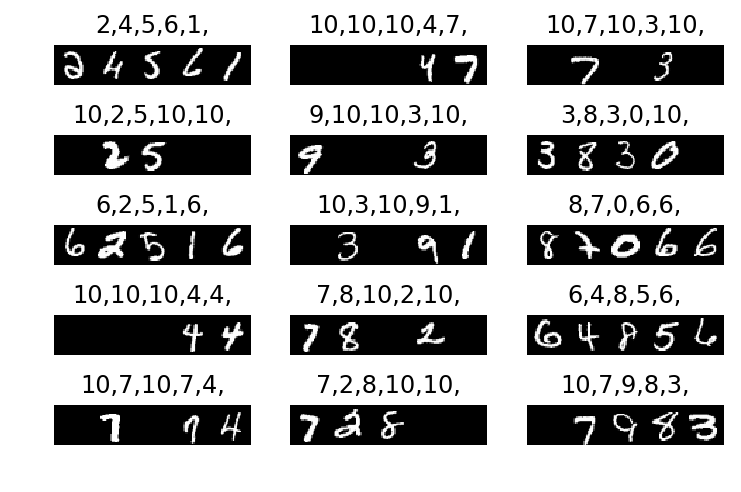

In [67]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**  
合成数据的方式：
- 把X_raw, y_raw用sklearn的train_test_split函数生成训练集和验证集，训练集的数量是48000个图片+标签，验证集的数量是12000个图片+标签。


- 首先编写程序random_list，这个程序随机生成一个由5个元素组成的list，这个list中有至少一个1，最多5个1，其余都为0；1代表这个位置有图片，0代表这个位置没有图片,并且1和0的位置是随机分配的。


- 编写generate_dataset程序，这个程序可以把输入的训练集，验证集和测试集扩充为由“**新图片**”组成的数据集，新图片是原有数据集中随机的1~5个图片横向拼接形成的。例如：训练集输入到该程序，我们根据训练集的数量进行循环，每次循环内都会遍历一遍新生成的random_list；如果是1，那么我们随机从训练集中找1张图片放到1对应的位置，如果是0我们就用一个全是0的numpy矩阵放到该位置，用concatenate命令把这些图片数据横向拼接到一起，新的训练集的图片与旧的训练集图片数量一致，但是新数据集中的每个图片由28*140个像素点组成。


- 新的标签集是一个list，这个list由5个np.array组成,每个np.array代表相应位置的图片的**标签集**，比如第一个np.array代表排列在第一幅图片位置的标签集，这个标签集的每个元素代表着数字或空字符，而“数字和空字符”是由“独热编码”表示的，独热编码有11个元素，第11位是1代表这个图片是一个空字符。 

综上所述，我们根据原有的训练集，验证集和测试集扩充为新的训练集，验证集和测试集，新的集合元素数量不变，所不同的就是集合的每个元素变为“随机取随机张图片”组合的图片。   

训练集的用处是：拟合模型的参数。验证集的功能就是调整模型的超参数。测试集的作用就是评估模型的表现（范化性能）。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [68]:
from keras.models import Model
from keras.layers import *
from keras.models import Sequential

# TODO: 构建你的模型
x = Input((28, 140, 1))

y = convolutional.Conv2D(32,3,strides=(1, 1), activation='relu', padding='valid')(x)
y = MaxPooling2D(pool_size = (2, 2),strides = (2, 2))(y)
y = Dropout(0.25)(y)

y = convolutional.Conv2D(64,5,strides=(1, 1),activation='relu', padding='valid')(y)
y = MaxPooling2D(pool_size = (2, 2),strides = (2, 2))(y)
y = Dropout(0.25)(y)

y = Flatten()(y)

digit1 = Dense(11, activation='softmax')(y)
digit2 = Dense(11, activation='softmax')(y)
digit3 = Dense(11, activation='softmax')(y)
digit4 = Dense(11, activation='softmax')(y)
digit5 = Dense(11, activation='softmax')(y)

model = Model(input = x, output = [digit1, digit2, digit3, digit4, digit5])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\archwolf\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 28, 140, 1)    0                                            
____________________________________________________________________________________________________
conv2d_11 (Conv2D)               (None, 26, 138, 32)   320                                          
____________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D)  (None, 13, 69, 32)    0                                            
____________________________________________________________________________________________________
dropout_21 (Dropout)             (None, 13, 69, 32)    0                                            
___________________________________________________________________________________________

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：**  
我采用的是卷积神经网络。卷积就是把“区块patch”（一个2维数组）与图像对应点相乘再相加,把最后的结果代替“区块patch”中心点的值，我们要求的就是这个2维数组，我们把它称为权重，另外还要设置偏置项；这里有个共享的概念，即扫描的时候这个2维数组不变，这样就可以大大简化求解参数的数量；在每层卷积层中可以有多个2维数组，每个二维数组称之为过滤器或者卷积核。设置多个卷积核的好处就是，可以捕捉多种信息，比如某个卷积核生成的图片是横向的线，另外一个卷积核生成的是纵向的线。卷积层不止一层，多的可能需要上百层，每一层都要设置patch的大小，卷积核的数量，扫描的横纵向的步长。最后可以将卷积层与全连接层相连，然后得到输出。这个输出要和我们目标值对比，神经网络的输出和目标值的差值用损失函数表示，我们的目的就是让这个损失函数最小。我们采用的是反向传播算法，这种方法可以更新权重和偏置项。一次正向传播和一次反向传播称为一次迭代，我们要在训练集上反复迭代多次，直到损失函数取最小值或接近最小值。对于本项目由于训练集的数据有48000个，为了避免陷入局部极小值的情况和内存不够用的情况，需要设置batchsize，即把训练集平均划分成许多的小的训练集，在这些小训练集上训练（在每个小训练集上完成一次迭代），但仍要设置epoch的数量，即在整体的训练集上循环几次。

我还采用了maxpooling,maxpooling就是选1个小方块（如2*2），按设定的步长（如步长是2）扫描已在卷积层上生成的图片，小方块中最大的那个点的数据保留，其余的舍去，最后得到一个简化的图片，即保留了图片的最重要的信息。用maxpooling的好处是（1）可以保证特征的位置与旋转不变性，因为不论这个强特征在哪个位置出现，都会不考虑其出现位置而能把它提出来。（2）MaxPooling能减少模型参数数量，有利于减少模型过拟合问题。  

我还采用了dropout，即在卷积层上随机设置部分权重为0，这么做的好处是可以减少计算量，还可以减小过拟合。

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

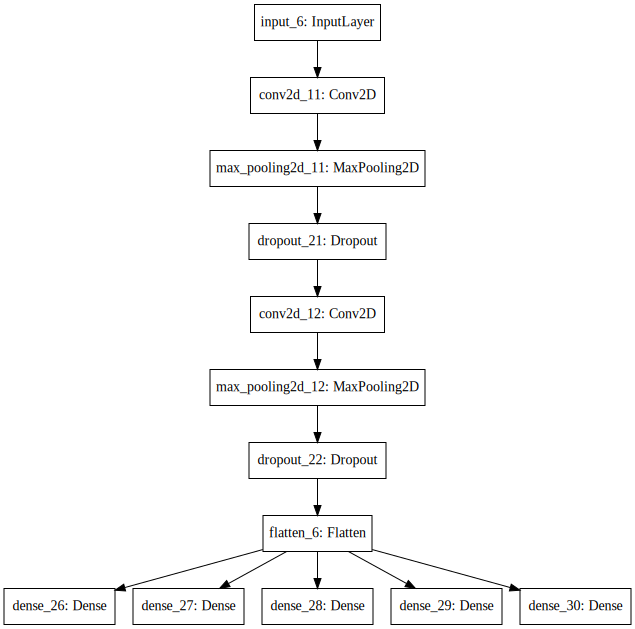

In [79]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
我Keras来构建模型，用tensorflow作为后端计算。我设置了2个卷积层：  
- 第一层我设置了32个卷积核，用3*3扫描，扫描步长横向和纵向都是1，激活函数是“Relu”，padding = valid，即没有padding，生成的图形要小一圈；然后用MaxPooling2x2扫描，横向和纵向步长都是2；并且设置Dropout(0.25)，即每一个神经元独立地以0.25的概率置为0。


- 第二层我设置了64个卷积核，用5*5扫描，扫描步长横向和纵向都是1，激活函数是“Relu”，padding = valid，；然后用然后用MaxPooling2x2扫描，横向和纵向步长都是2；并且设置Dropout(0.25)，即每一个神经元独立地以0.25的概率置为0。


- 用Flatten层用来将输入“向量化”，即把多维的输入一维化。


- Flatten层连接输出层，实际是5个输出层，分别对应5幅图的标签，每个输出层对应11个输出，激活函数是'softmax'。


- 最后编译模型，损失函数设置为“categorical_crossentropy”，优化器设置为“adam”，评估标准为准确率'accuracy'。


- 构架的可视化见上图。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [70]:
# TODO: 训练你的模型
start = time.clock()
model.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_valid, y_valid), verbose=2)
end = time.clock()
print ("spend: %f s" % (end - start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
15s - loss: 24.2283 - dense_26_loss: 5.1832 - dense_27_loss: 4.7722 - dense_28_loss: 4.4212 - dense_29_loss: 4.8413 - dense_30_loss: 5.0104 - dense_26_acc: 0.5436 - dense_27_acc: 0.5845 - dense_28_acc: 0.6071 - dense_29_acc: 0.5709 - dense_30_acc: 0.5411 - val_loss: 1.6909 - val_dense_26_loss: 0.3385 - val_dense_27_loss: 0.3040 - val_dense_28_loss: 0.3001 - val_dense_29_loss: 0.3053 - val_dense_30_loss: 0.4432 - val_dense_26_acc: 0.9014 - val_dense_27_acc: 0.9022 - val_dense_28_acc: 0.9097 - val_dense_29_acc: 0.9038 - val_dense_30_acc: 0.8666
Epoch 2/20
13s - loss: 1.0716 - dense_26_loss: 0.2017 - dense_27_loss: 0.1999 - dense_28_loss: 0.1920 - dense_29_loss: 0.2084 - dense_30_loss: 0.2696 - dense_26_acc: 0.9388 - dense_27_acc: 0.9381 - dense_28_acc: 0.9420 - dense_29_acc: 0.9367 - dense_30_acc: 0.9173 - val_loss: 0.3832 - val_dense_26_loss: 0.0696 - val_dense_27_loss: 0.0726 - val_dense_28_loss: 0.0712 - val_dense_29_loss: 0

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [80]:
from keras import metrics

def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    y_pred = model.predict(X_test, batch_size=512, verbose=0)
    pred = np.argmax(y_pred, axis=2)
    test = np.argmax(y_test, axis=2)
    return np.min((pred==test), axis=0).mean()

print(evaluate(model))

0.9575


##### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**  
在测试集上要考虑5张图片全对的概率。在测试集上我模型的准确率为95.75%，我认为我的模型可以解决实际问题。实际上epoch=10的情况，准确率都超过了94%。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

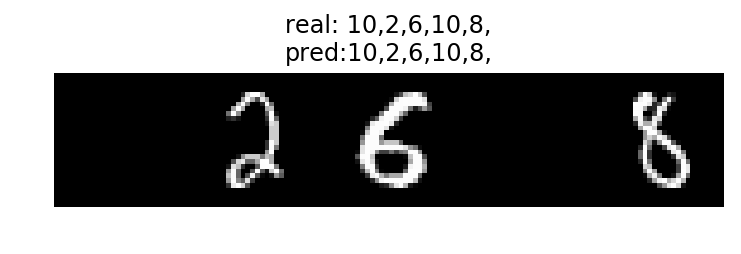

In [82]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [83]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())